# read one proxy JSON file from disk 

In [1]:
import pathlib 

### importing the modules from `paleopy`

In [2]:
from paleopy import utils, analogs
from paleopy.plotting import scalar_plot

### define the path to where the proxy json files reside 

In [3]:
dpath = pathlib.Path('/home/nicolasf/research/PICT_notebooks/jsons/proxies/')

### This will return the list of the proxies currently in {dpath}

In [4]:
list(dpath.glob("*.json"))

[PosixPath('/home/nicolasf/research/PICT_notebooks/jsons/proxies/Rarotonga.json')]

### choose the name of the proxy 

In [5]:
proxy_name = 'Rarotonga'

In [6]:
jsonfile = dpath.joinpath(f"{proxy_name}.json")

### use the utility `make_proxy_from_json` to create a dummy proxy object that can then be passed to the `analogs` class

In [7]:
p = utils.make_proxy_from_json(jsonfile, djsons='/home/nicolasf/research/PICT_notebooks/jsons/')

In [8]:
p.dataset

'ersst'

In [9]:
p.variable

'sst'

In [10]:
p.analog_years

[1974, 1976, 1997, 1999, 2000, 2001, 2006, 2009, 2011, 2017]

In [11]:
p.period

[1972, 2019]

### pass the dummy proxy object to the `analogs` class, here with Tmean from the NCEP reanalysis 

In [12]:
compos = analogs(p, 'ncep', 'TMean')

### the object inherit the attributes of the proxy 

In [13]:
compos.analog_years

[1974, 1976, 1997, 1999, 2000, 2001, 2006, 2009, 2011, 2017]

### call the `composite` method to calculate the composite from the analog years 

In [14]:
compos.composite()

In [15]:
compos.dset

<xarray.Dataset>
Dimensions:              (time: 888, latitudes: 73, longitudes: 144, dates: 73,
                          years: 10)
Coordinates:
  * longitudes           (longitudes) float32 0.0 2.5 5.0 ... 352.5 355.0 357.5
  * time                 (time) datetime64[ns] 1948-01-01 ... 2021-12-01
  * latitudes            (latitudes) float32 -90.0 -87.5 -85.0 ... 87.5 90.0
  * dates                (dates) datetime64[ns] 1949-02-01 ... 2021-02-01
  * years                (years) int64 1974 1976 1997 1999 ... 2009 2011 2017
Data variables:
    TMean                (time, latitudes, longitudes) float32 -18.0 ... -20.0
    seas_var             (dates, latitudes, longitudes) float64 -24.7 ... -26.11
    composite_sample     (years, latitudes, longitudes) float64 -29.42 ... -2...
    composite_anomalies  (latitudes, longitudes) float64 -0.06703 ... 1.467
    pvalues              (latitudes, longitudes) float64 0.8678 ... 0.04527
Attributes:
    description:                     Data from NCEP initialized reanalysis (4...
    platform:                        Model
    Conventions:                     COARDS
    NCO:                             20121012
    history:                         Thu May  4 20:11:16 2000: ncrcat -d time...
    title:                           monthly mean air.sig995 from the NCEP Re...
    dataset_title:                   NCEP-NCAR Reanalysis 1
    References:                      http://www.psl.noaa.gov/data/gridded/dat...
    DODS_EXTRA.Unlimited_Dimension:  time

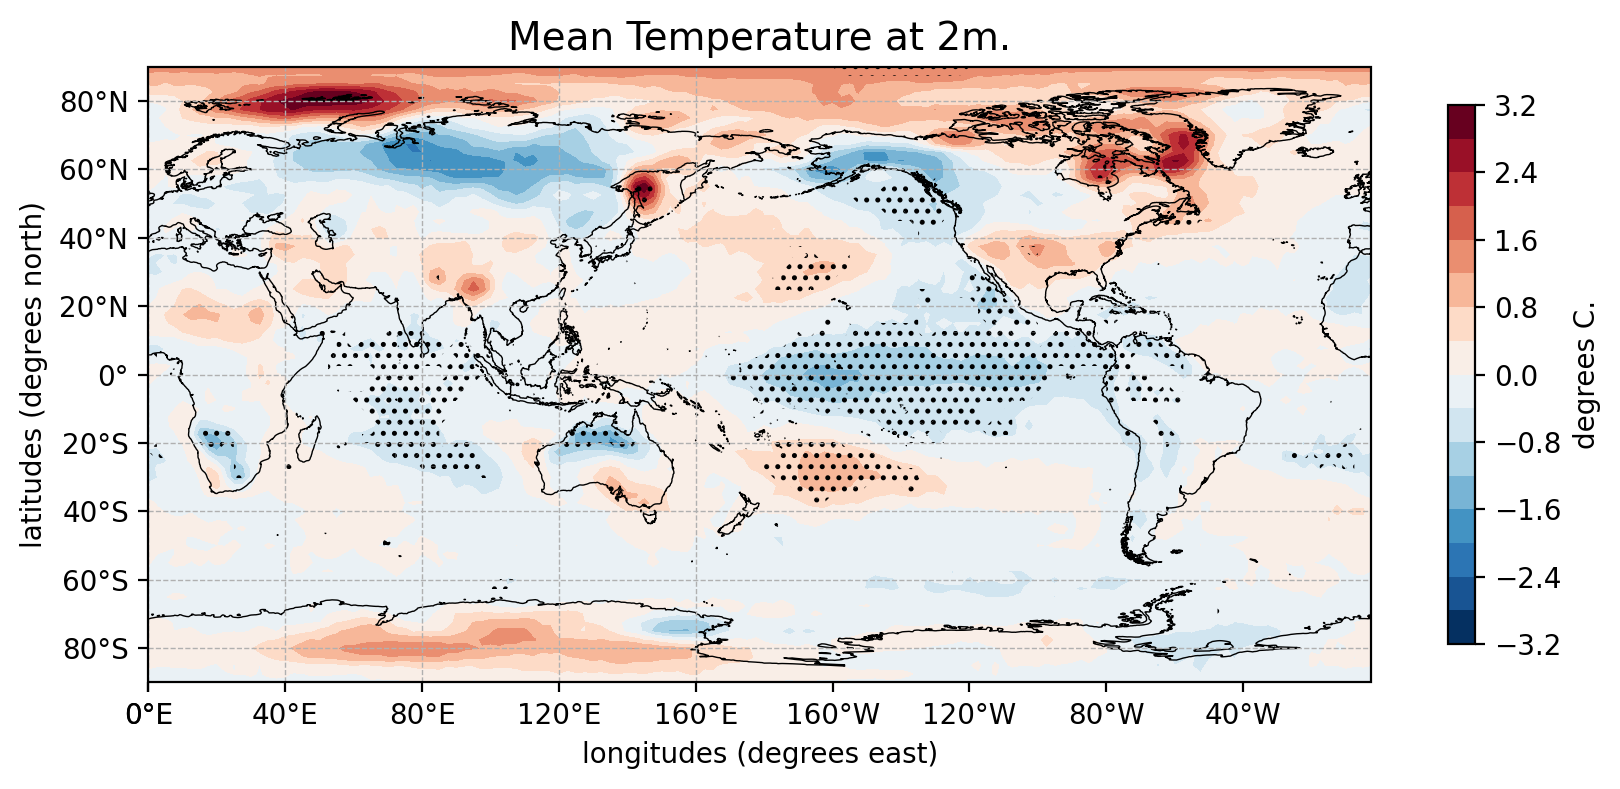

In [16]:
f, ax = scalar_plot(compos).plot()

### Now do the same with the SSTs from the ERSST dataset 

In [17]:
compos = analogs(p, 'ersst', 'sst')

In [18]:
compos.composite()

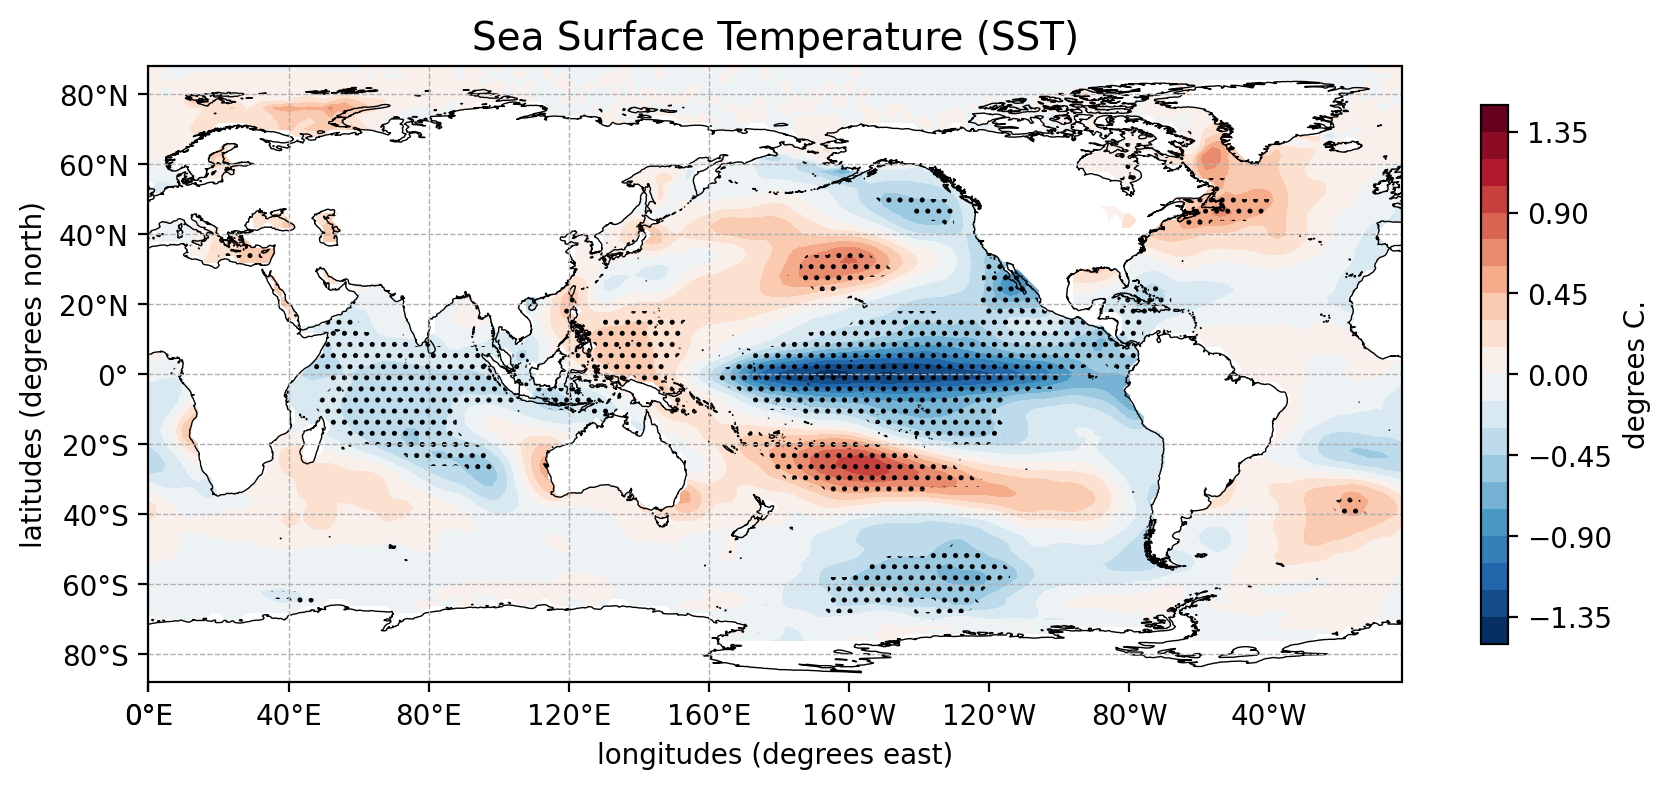

In [19]:
f, ax = scalar_plot(compos).plot()